# Original table analysis

#### Which sub probabilities are included in the original table?

In [1]:
setting = dict(
Qe_values = [0x5601,0x3401,0x1801,0x0ac1,0x0521,0x0221,0x5601,0x5401,0x4801,0x3801,
  0x3001,0x2401,0x1c01,0x1601,0x5601,0x54ff,0x5401,0x527d,0x5101,0x4c5f,
  0x4801,0x3f80,0x3801,0x35f7,0x3401,0x31f6,0x3001,0x2801,0x2401,0x2201,
  0x1c01,0x1801,0x1601,0x1401,0x1201,0x1101,0x0ac1,0x09c1,0x08a1,0x0521,
  0x0441,0x02a1,0x0221,0x0141,0x0111,0x0085,0x0049,0x0025,0x0015,0x0009,
  0x0005,0x0001,0x5601],

Qe_switch = [1,0,0,0,0,0,1,0,0,0,
  0,0,0,0,1,0,0,0,0,0,
  0,0,0,0,0,0,0,0,0,0,
  0,0,0,0,0,0,0,0,0,0,
  0,0,0,0,0,0,0,0,0,0,
  0,0,0],

Qe_MPS = [1,2,3,4,5,44,7,8,9,10,
  11,12,13,35,15,16,17,18,19,20,
  21,22,23,24,25,26,27,28,29,30,
  31,32,33,34,35,36,37,38,39,40,
  41,42,43,44,45,45,47,48,49,50,
  51,51,52],

Qe_LPS = [  1,6,9,12,35,39,6,14,14,14,
  20,22,25,27,14,14,14,15,16,17,
  18,19,20,21,22,23,24,25,26,27,
  28,29,30,31,32,33,34,35,36,37,
  38,39,40,41,42,43,44,45,46,47,
  48,49,52],)

# Probability that MPS occurs = 1 - Qe_decimal

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.DataFrame(setting)
df['Qe_decimal'] = df.loc[:,'Qe_values'] * 1.5 / (1 << 16)

In [4]:
df

,Qe_values,Qe_switch,Qe_MPS,Qe_LPS,Qe_decimal
0,22017,1,1,1,0.503929
1,13313,0,2,6,0.304710
2,6145,0,3,9,0.140648
3,2753,0,4,12,0.063011
4,1313,0,5,35,0.030052
5,545,0,44,39,0.012474
6,22017,1,7,6,0.503929
7,21505,0,8,14,0.492210
8,18433,0,9,14,0.421898
9,14337,0,10,14,0.328148


- The table consists of several different probability declines
- Starting point of these intervals are where Qe_LPS > Index **?**

In [5]:
starting_point_of_new_intervals = np.append([0], df.Qe_LPS[df.Qe_LPS >= df.index].unique())
backward_point_of_old_intervals = [x for x in range(53) if x not in starting_point_of_new_intervals]

In [6]:
def follow_mps(df, start):
    ix = start
    probabilities = []
    while True:
        prob = df.loc[ix, 'Qe_decimal']
        probabilities.append(prob)
        if df.loc[ix,'Qe_MPS'] == ix:
            break
        ix = df.loc[ix,'Qe_MPS']
    return np.array(probabilities)

def follow_lps(df, start):
    ix = start
    probabilities = []
    while True:
        prob = df.loc[ix, 'Qe_decimal']
        probabilities.append(prob)
        if df.loc[ix,'Qe_LPS'] == ix:
            break
        ix = df.loc[ix,'Qe_LPS']
    return np.array(probabilities)

In [15]:
def append(to, what, how_often, front=True):
    tmp = [what] * how_often
    if front:
        return np.append(tmp, to)
    return np.append(to, tmp)

In [8]:
probabilities = {'S'+str(s): follow_mps(df, s) for s in starting_point_of_new_intervals}
adjusted_prob = {s: append(k, None, 32 - len(k)) for s,k in probabilities.items()}

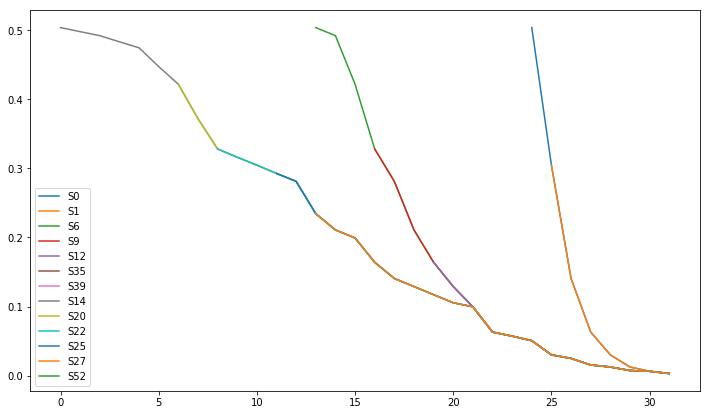

In [9]:
pd.DataFrame(adjusted_prob).plot(figsize=(12,7));

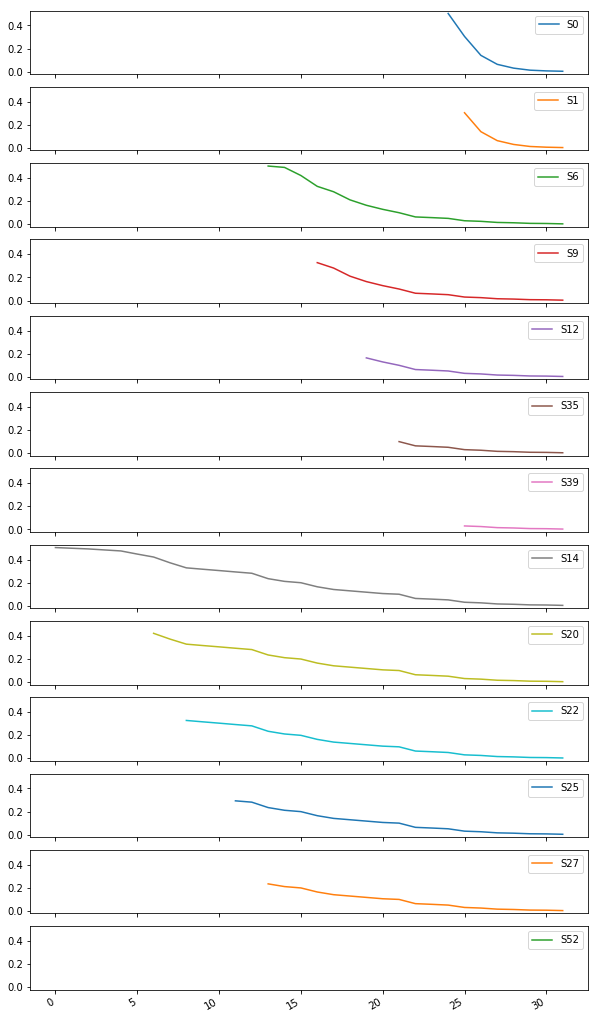

In [10]:
pd.DataFrame(adjusted_prob).plot(figsize=(10,20),subplots=True, sharey=True);

In [16]:
probabilities = {'S'+str(s): follow_lps(df, s) for s in backward_point_of_old_intervals}
adjusted_prob = {s: append(k, None, 32 - len(k), False) for s,k in probabilities.items()}

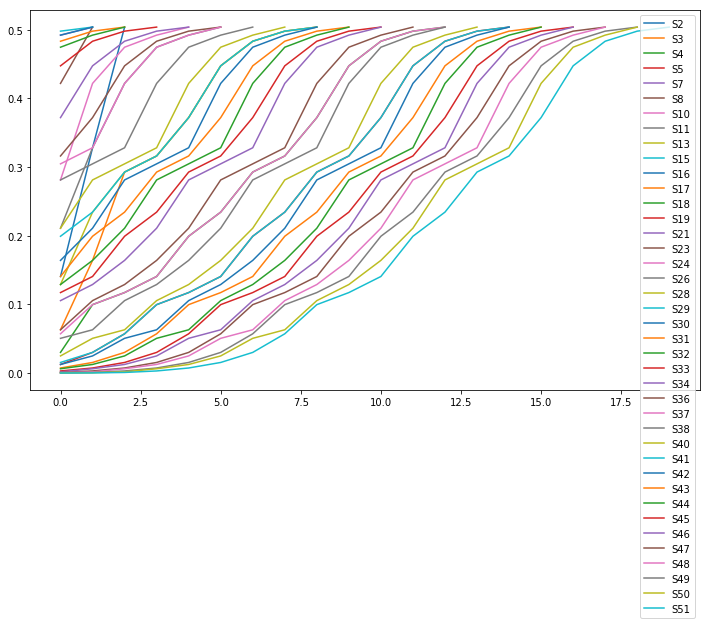

In [17]:
pd.DataFrame(adjusted_prob).plot(figsize=(12,7));

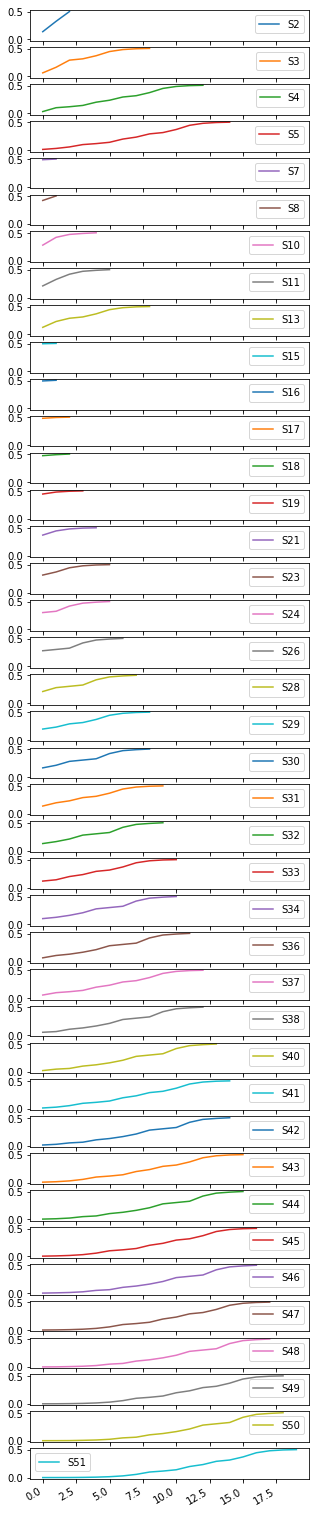

In [18]:
pd.DataFrame(adjusted_prob).plot(figsize=(5,30),subplots=True, sharey=True);